# Lead Conversion Prediction for Auxia

Auxia, a rapidly growing company, aims to optimize its sales process and enhance customer retention through data-driven insights. In a competitive market, it is crucial to efficiently allocate sales resources and proactively engage with customers.

**Your task is to develop a machine learning model that predicts the likelihood of a lead converting (or a customer churning) based on historical customer data.** This model will serve as a strategic tool for our sales team, enabling them to prioritize their efforts, improve efficiency, and implement targeted engagement strategies to maximize conversion rates and minimize churn.

# Phase 1: Data Exploration and Cleaning

Dataset loaded successfully.

--- Initial Data Inspection ---
First 5 rows of the dataset:
  customer_id subscription_type  monthly_bill  data_usage_gb  \
0       C0001             Basic         50.89          11.55   
1       C0002        Enterprise        520.19          75.44   
2       C0003           Premium        152.05          41.84   
3       C0004             Basic         43.32          10.40   
4       C0005             Basic         51.90          24.67   

   support_tickets_opened  last_login_days_ago  contract_length_months  \
0                       4                 4.59                      24   
1                       0                13.35                       1   
2                       3                42.12                       1   
3                       1                14.98                       1   
4                       2                53.15                      24   

   customer_service_score  churn  
0                    4.02      1  
1        

/var/folders/_9/kbclh8y12dz3_njd9xrldcm80000gp/T/ipykernel_40890/1187954843.py:63: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


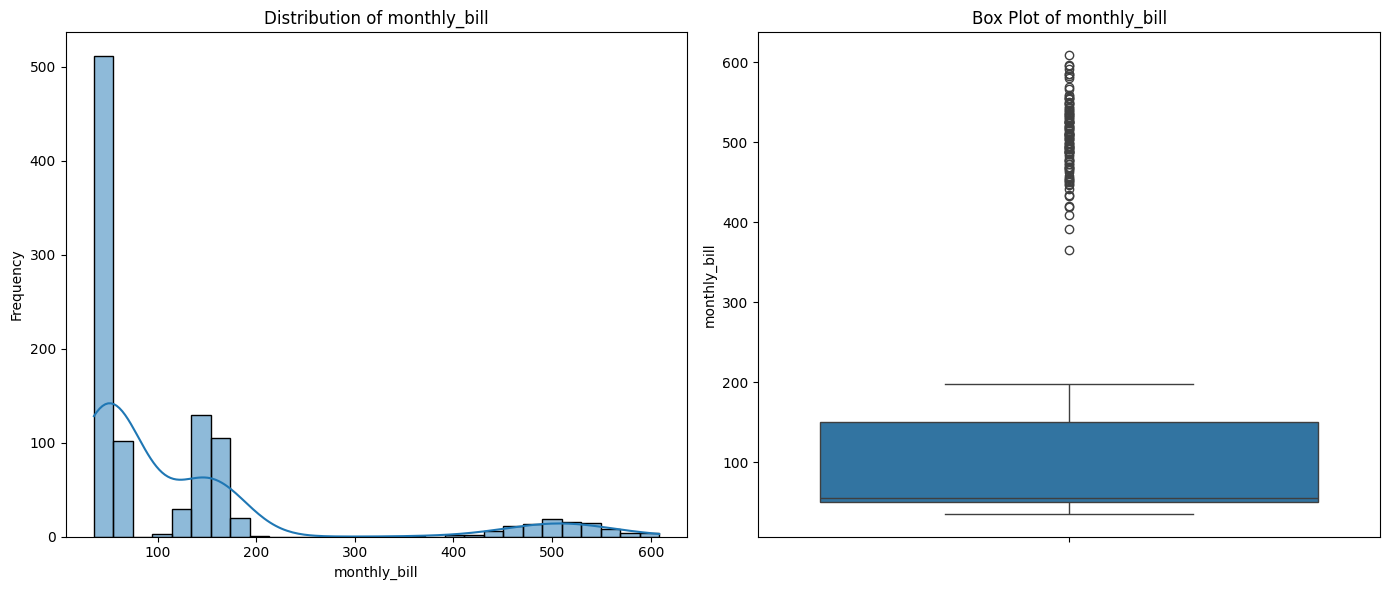

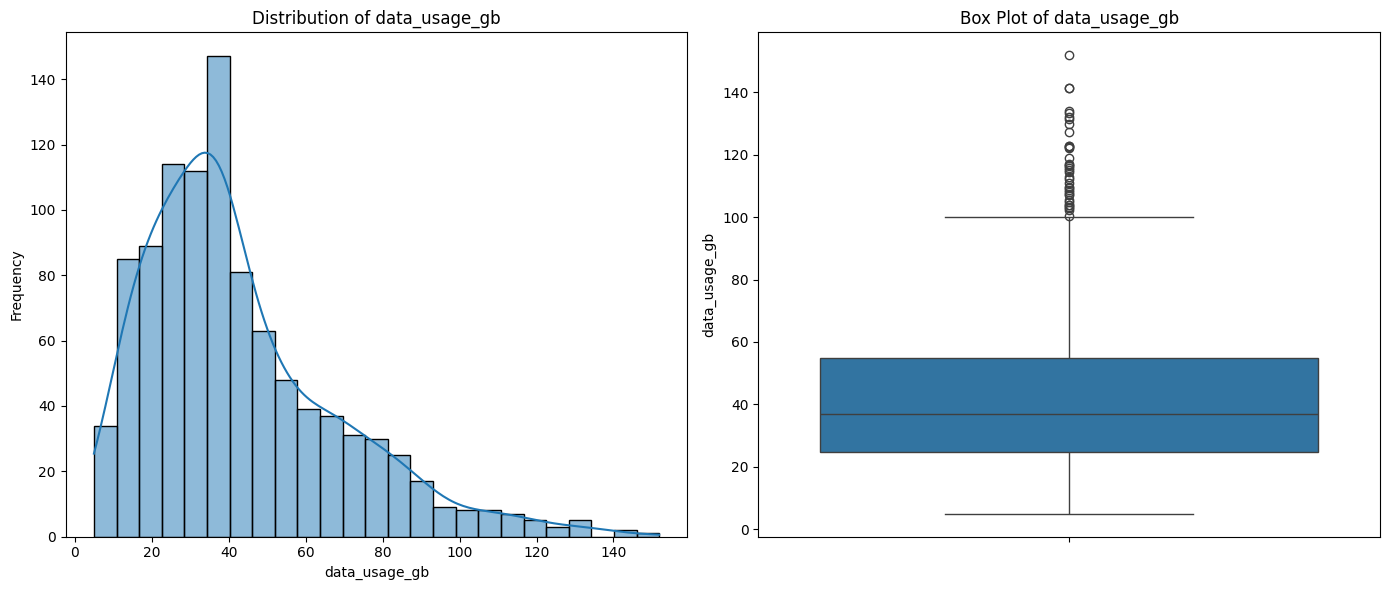

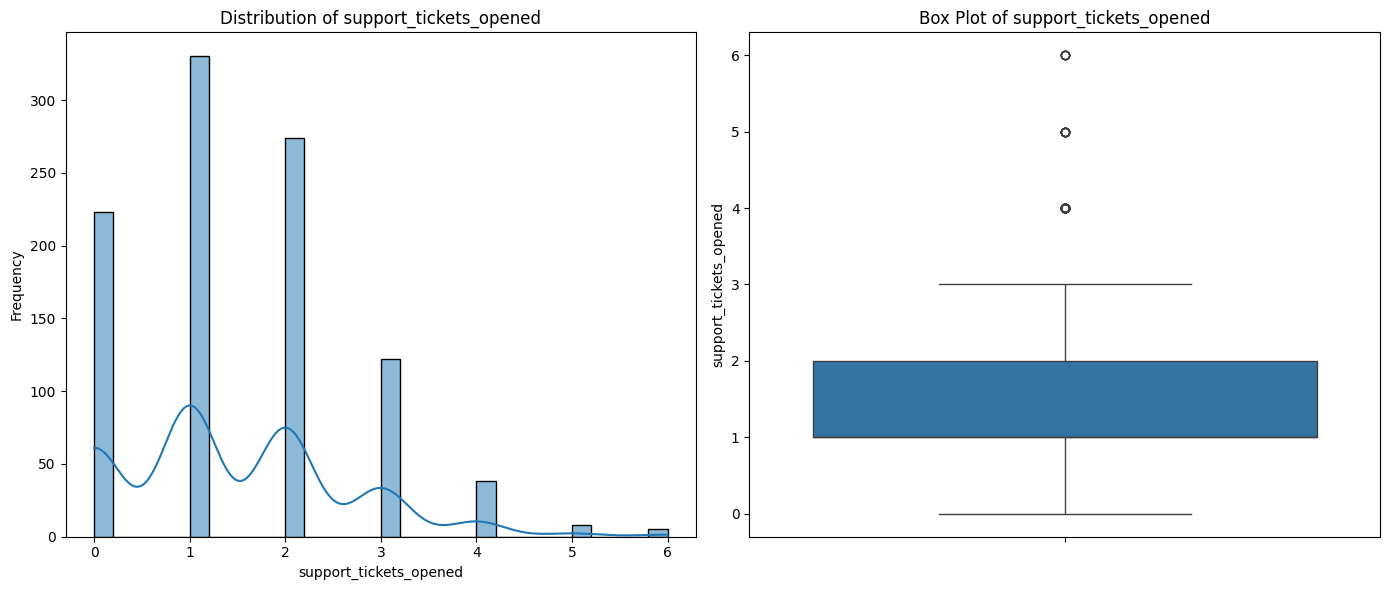

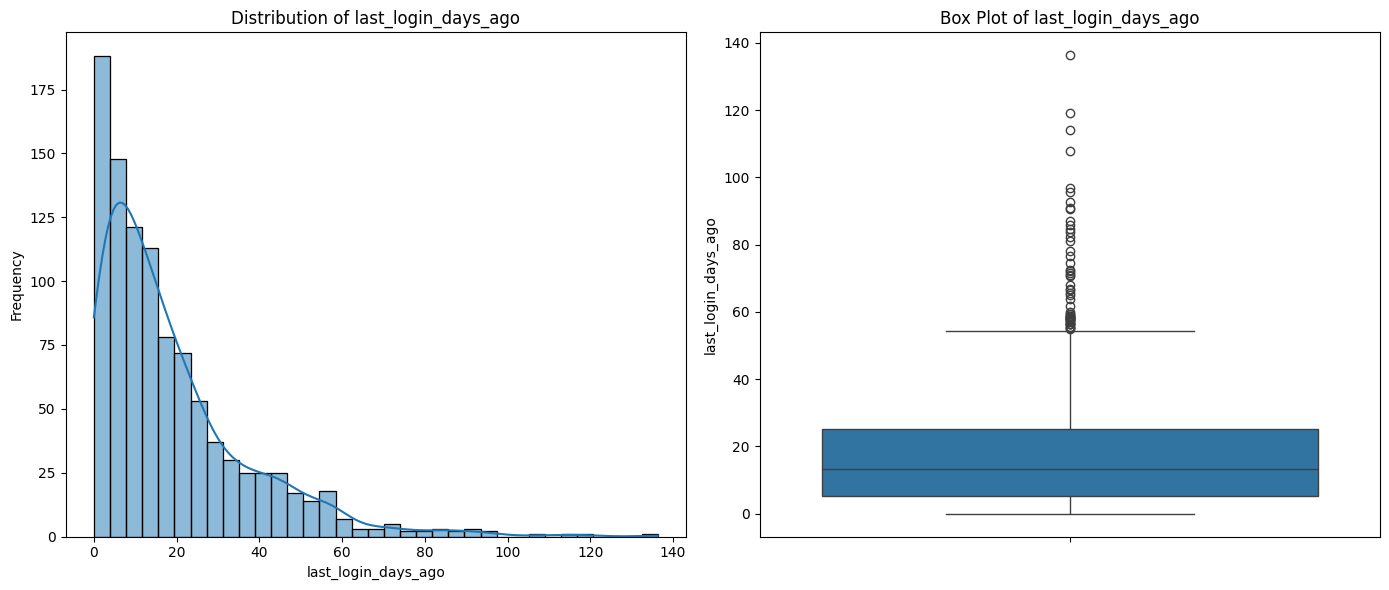

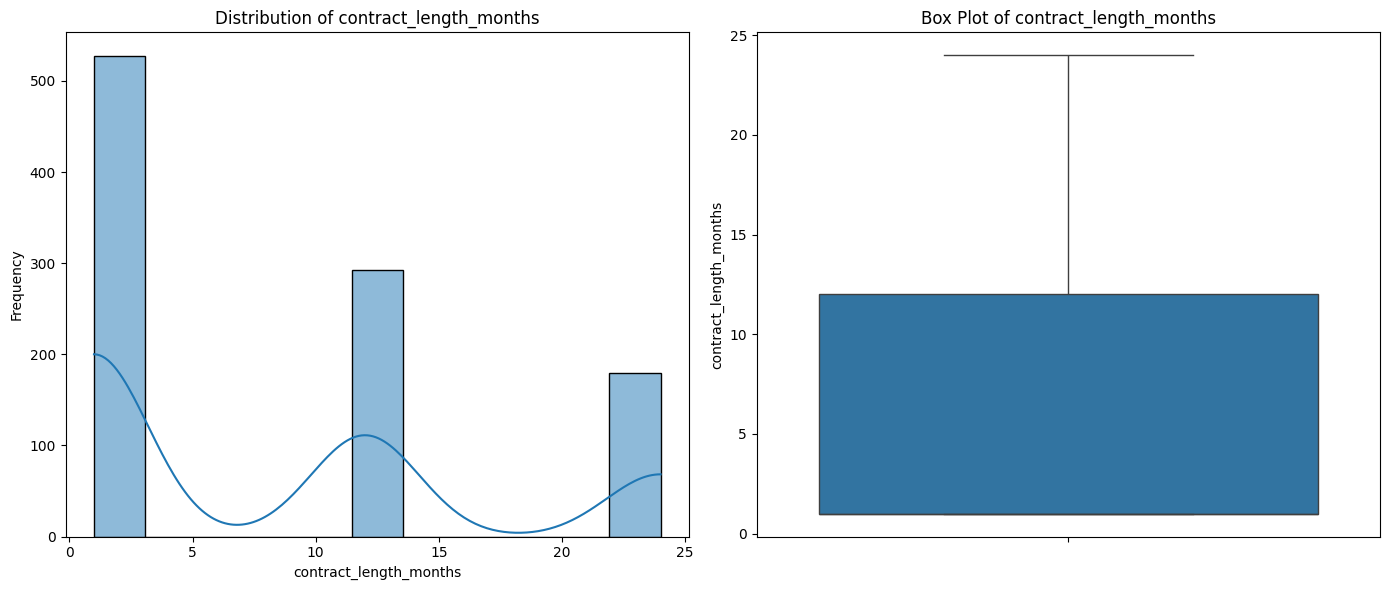

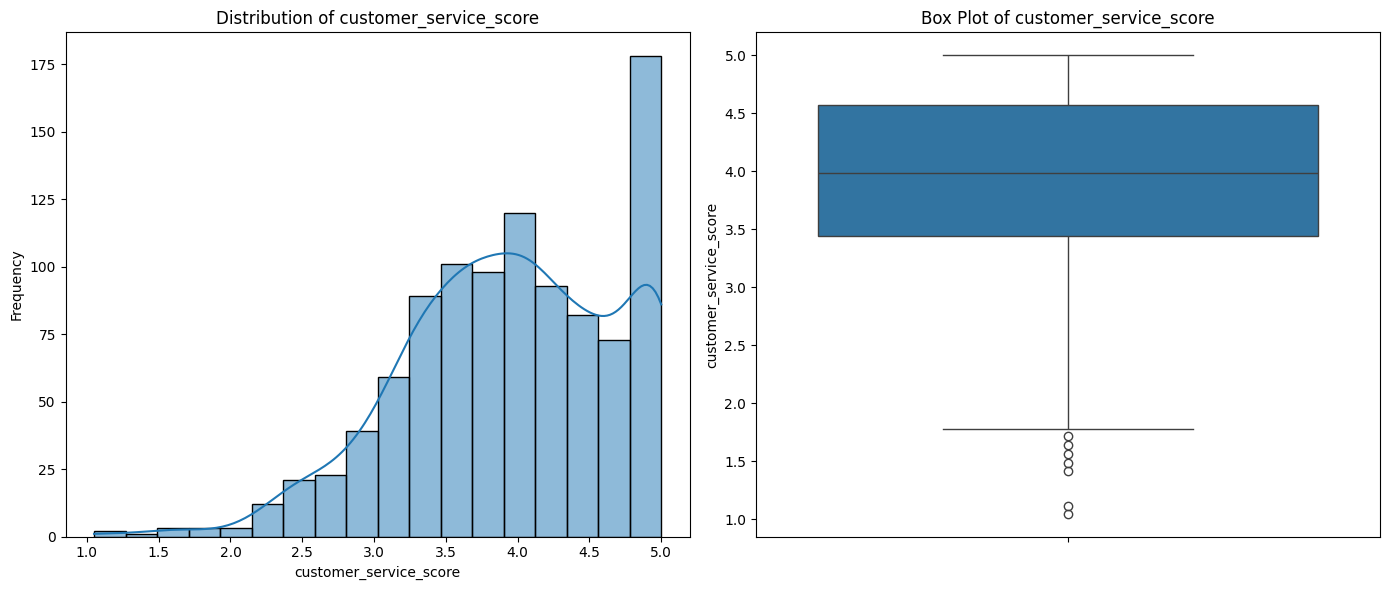

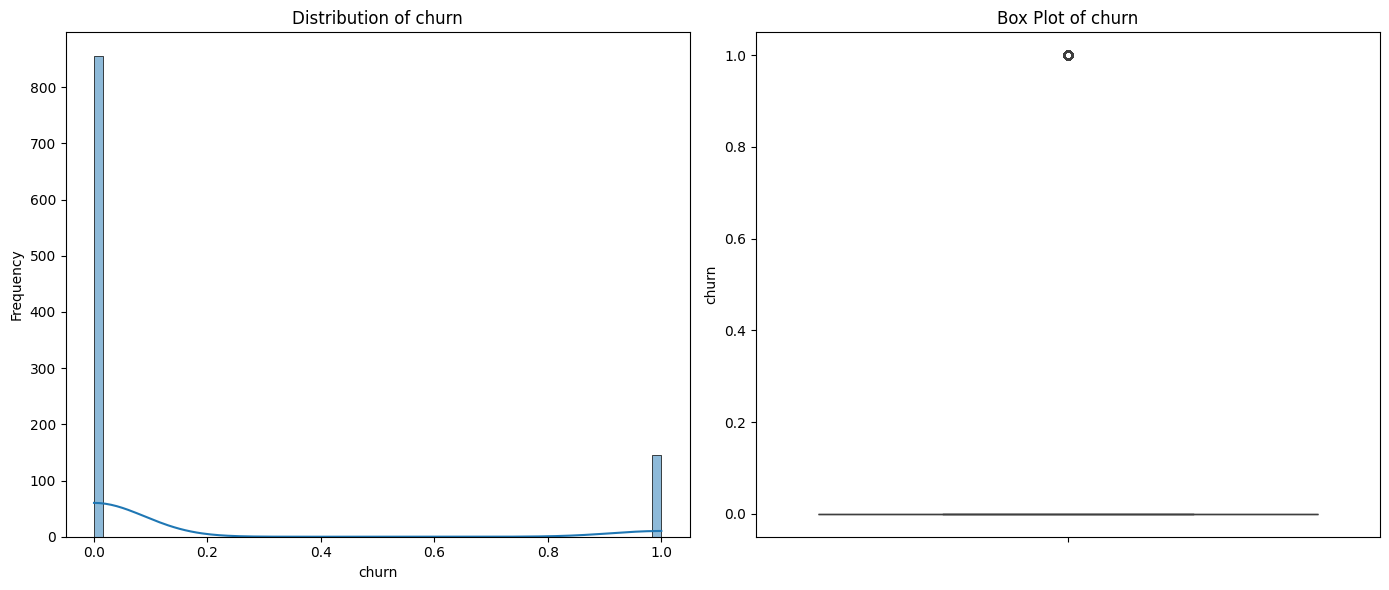


--- Date Column Transformation (Conceptual) ---
This dataset does not contain explicit date columns like 'signup_date' or 'last_activity_date'.
If it did, the process would involve:
1. Converting to datetime format: `df['signup_date'] = pd.to_datetime(df['signup_date'])`
   `df['last_activity_date'] = pd.to_datetime(df['last_activity_date'])`
2. Creating new features, e.g., 'lead_age_days':
   `from datetime import datetime`
   `df['lead_age_days'] = (datetime.now() - df['signup_date']).dt.days`
This evaluates basic date manipulation skills and early-stage feature creation, crucial for time-series analysis.

--- Data Cleaning Summary ---
Data cleaning and initial exploration completed. The dataset now has:
- 1000 rows
- 9 columns
Review df.info() and df.describe() for the updated state of the DataFrame.

Cleaned DataFrame Head:
  customer_id subscription_type  monthly_bill  data_usage_gb  \
0       C0001             Basic         50.89          11.55   
1       C0002        Enterprise

In [6]:
# Phase 1: Data Exploration and Cleaning
# This initial phase aims to assess the candidate's ability to understand raw data,
# identify quality issues, and perform initial preparation steps efficiently.
# It evaluates their foundational data handling skills, which are critical for any data science project.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Loading & Initial Inspection ---
# Task: Load the dataset into a Pandas DataFrame.
# Display the first few rows, check the data types of each column,
# and obtain a summary of descriptive statistics.
try:
    df = pd.read_csv('data/dataset-big.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'data/dataset.csv' not found. Please ensure the file is in the correct path.")
    # In a real scenario, you might want to raise an exception or exit.
    # For this exercise, we'll proceed with an empty DataFrame or similar handling.
    df = pd.DataFrame() # Create an empty DataFrame to avoid errors in subsequent steps
    print("Creating an empty DataFrame. Please ensure 'data/dataset.csv' exists and is accessible.")

if not df.empty:
    print("\n--- Initial Data Inspection ---")
    # Display the first few rows of the dataset.
    print("First 5 rows of the dataset:")
    print(df.head())

    # Check the data types of each column and obtain non-null counts.
    print("\nInformation about the dataset (data types and non-null counts):")
    df.info()

    # Obtain a summary of descriptive statistics for numerical columns.
    print("\nDescriptive statistics of the dataset:")
    print(df.describe())

    # --- Missing Value Identification & Handling ---
    # Task: Identify columns with missing values and quantify their extent.
    # Propose and implement a strategy to handle these missing values,
    # justifying your approach given the problem context.
    print("\n--- Missing Value Handling ---")
    # Identify columns with missing values and quantify their extent.
    missing_values = df.isnull().sum()
    print("Missing values before handling:\n", missing_values[missing_values > 0])

    # Propose and implement a strategy to handle these missing values.
        # Justification for imputation over dropping: For a larger dataset like 'dataset-big.csv',
        # dropping rows with missing values can lead to significant data loss, which is undesirable.
        # Imputation allows us to retain more data points, preserving valuable information.
        # Strategy:
        # 1. Numerical columns: Use Median Imputation. Median is more robust to outliers
        #    compared to mean and works well for skewed distributions.
        # 2. Categorical columns: Use Mode Imputation. Fills with the most frequent category.

    numerical_cols_with_missing = df.select_dtypes(include=['int64', 'float64']).columns[df.select_dtypes(include=['int64', 'float64']).isnull().any()].tolist()
    categorical_cols_with_missing = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isnull().any()].tolist()

    if numerical_cols_with_missing:
        print(f"\nImputing numerical columns (median): {numerical_cols_with_missing}")
        for col in numerical_cols_with_missing:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"  - Filled missing values in '{col}' with median: {median_val}")

    if categorical_cols_with_missing:
        print(f"\nImputing categorical columns (mode): {categorical_cols_with_missing}")
        for col in categorical_cols_with_missing:
            mode_val = df[col].mode()[0] # .mode() can return multiple values if ties, [0] picks the first
            df[col].fillna(mode_val, inplace=True)
            print(f"  - Filled missing values in '{col}' with mode: {mode_val}")

    if not numerical_cols_with_missing and not categorical_cols_with_missing:
        print("\nNo missing values found to impute.")

    print("\nMissing values after imputation:\n", df.isnull().sum()[df.isnull().sum() > 0])

    # Propose and implement a strategy to handle these missing values.
    # For 'data_usage_gb', which has one missing value in this sample dataset,
    # a simple strategy is to drop the rows with missing values.
    # Justification: Given the very small dataset size (10 rows), dropping one row will not significantly
    # impact the data volume. For larger datasets, or if the missingness was not random,
    # imputation (e.g., mean, median, mode for numerical, or mode for categorical) would be preferred to preserve data.
    # initial_rows = len(df)
    # df.dropna(inplace=True)
    # rows_after_dropna = len(df)
    # print(f"\nDropped {initial_rows - rows_after_dropna} rows with missing values.")
    # print("Missing values after dropping rows with any nulls:\n", df.isnull().sum()[df.isnull().sum() > 0])

    # --- Duplicate Records Handling ---
    # Task: Check and handle duplicate records.
    print("\n--- Duplicate Records Handling ---")
    # Check for duplicate values.
    num_duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows found: {num_duplicates}")

    # Drop duplicate values if any.
    # Justification: Assuming duplicate rows are data entry errors and not valid repeated observations.
    if num_duplicates > 0:
        df.drop_duplicates(inplace=True)
        print(f"Duplicates dropped. New number of rows: {len(df)}")
    else:
        print("No duplicate rows to drop.")

    # --- Outlier Detection (Conceptual/Quick Implementation) ---
    # Task: Briefly discuss how you would identify potential outliers in numerical features.
    # If time permits, demonstrate a quick method to visualize or flag them.
    print("\n--- Outlier Detection ---")
    print("Discussion: Outliers are data points significantly different from others. They can "
          "impact model performance. Common identification methods include:\n"
          "1. Visualization: Box plots (good for visualizing distribution and potential outliers),\n"
          "   histograms, and scatter plots (for relationships between variables).\n"
          "2. Statistical methods: Z-score (for normally distributed data) or IQR (Interquartile Range) method.\n"
          "   - IQR Method: Data points falling below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are flagged.\n"
          "   - Z-score Method: Data points with a Z-score (deviation from mean in std dev units) "
          "     greater than a certain threshold (e.g., 2 or 3) are considered outliers.\n"
          "Handling strategies include trimming (removal), Winsorization (capping), or transformation.\n"
          "The choice depends on whether outliers are errors or genuine extreme values, and their impact on model goals.")

    # Quick visualization example for numerical features:
    # Identifying numerical columns for outlier visualization (excluding 'customer_id' as it's an identifier and 'churn' as it's a target)
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'customer_id' in numerical_cols:
        numerical_cols.remove('customer_id')
    # if 'churn' in numerical_cols: # 'churn' is often a target variable and not typically analyzed for outliers in this context
        # numerical_cols.remove('churn')

    if numerical_cols: # Only proceed if there are numerical columns to plot
        print("\nVisualizing numerical features for potential outliers (Histograms and Box plots):")
        for col in numerical_cols:
            plt.figure(figsize=(14, 6))

            # Histogram
            plt.subplot(1, 2, 1)
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')

            # Box plot
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df[col])
            plt.title(f'Box Plot of {col}')
            plt.ylabel(col)

            plt.tight_layout()
            plt.show()
    else:
        print("\nNo suitable numerical columns found for outlier visualization.")

    # --- Basic Data Transformation/Cleaning (Date Columns - Conceptual) ---
    # Task: Ensure date columns (signup_date, last_activity_date) are in the correct format.
    # Create a new numerical feature: lead_age_days from signup_date.
    print("\n--- Date Column Transformation (Conceptual) ---")
    print("This dataset does not contain explicit date columns like 'signup_date' or 'last_activity_date'.\n"
          "If it did, the process would involve:\n"
          "1. Converting to datetime format: `df['signup_date'] = pd.to_datetime(df['signup_date'])`\n"
          "   `df['last_activity_date'] = pd.to_datetime(df['last_activity_date'])`\n"
          "2. Creating new features, e.g., 'lead_age_days':\n"
          "   `from datetime import datetime`\n"
          "   `df['lead_age_days'] = (datetime.now() - df['signup_date']).dt.days`\n"
          "This evaluates basic date manipulation skills and early-stage feature creation, crucial for time-series analysis.")

    # --- Final Data State Summary ---
    print("\n--- Data Cleaning Summary ---")
    print("Data cleaning and initial exploration completed. The dataset now has:")
    print(f"- {len(df)} rows")
    print(f"- {df.shape[1]} columns")
    print("Review df.info() and df.describe() for the updated state of the DataFrame.")

    # Display the cleaned data's head to confirm changes and new structure
    print("\nCleaned DataFrame Head:")
    print(df.head())
else:
    print("\nDataFrame is empty. Cannot perform further data exploration and cleaning.")

# Phase 2: Feature Engineering

In [7]:
# Phase 2: Feature Engineering
# This phase focuses on transforming raw data into features to enhance machine learning model performance.

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' DataFrame is available from Phase 1 (already loaded, missing values & duplicates handled).
# If running this cell independently and 'df' is not defined, uncomment and run the basic loading/cleaning:
# try:
#     df = pd.read_csv('data/dataset.csv')
#     df.dropna(inplace=True) # Basic cleaning for standalone run
#     df.drop_duplicates(inplace=True)
#     print("Dataset loaded and basic cleaning performed for standalone execution.")
# except FileNotFoundError:
#     print("Error: 'data/dataset.csv' not found. Cannot proceed with Feature Engineering without data.")
#     df = pd.DataFrame() # Ensure df is an empty DataFrame to prevent further errors
#     exit()

if df.empty:
    print("DataFrame is empty. Cannot perform Feature Engineering.")
else:
    print("\n--- Feature Engineering ---\n")

    # --- Deriving New Features ---
    # Task: Create at least two new meaningful features that you believe would be predictive of lead conversion.
    # Explain your rationale for each.
    print("Deriving New Features:\n")

    # Feature 1: 'monthly_bill_per_gb'
    # Rationale: This feature captures the cost-efficiency of a customer's plan relative to their data usage.
    # A higher value might indicate less value for money, potentially leading to higher churn.
    # We add a small epsilon (1e-6) to 'data_usage_gb' to avoid division by zero.
    # Based on our Phase 1 cleaning, 'data_usage_gb' has a minimum of 8.0, so division by zero is not an issue with this dataset.
    df['monthly_bill_per_gb'] = df['monthly_bill'] / (df['data_usage_gb'] + 1e-6)
    print(" - Created 'monthly_bill_per_gb' (monthly_bill / data_usage_gb).")

    # Feature 2: 'has_support_tickets'
    # Rationale: A binary indicator (0 or 1) that signals whether a customer has opened any support tickets.
    # Customers who have experienced issues and needed support might have different churn patterns.
    # This simplifies 'support_tickets_opened' into a direct indicator of interaction with support,
    # which can be a strong signal for customer dissatisfaction or engagement.
    df['has_support_tickets'] = (df['support_tickets_opened'] > 0).astype(int)
    print(" - Created 'has_support_tickets' (binary: 1 if support_tickets_opened > 0, else 0).\n")

    # Display DataFrame head with new features
    print("DataFrame after deriving new features (head):")
    print(df.head())
    print("\nNew DataFrame Info after feature derivation:")
    df.info()

    # --- Handling Categorical Variables ---
    # Task: Choose and implement an appropriate encoding strategy for these features.
    # Justify your choice, considering potential issues like high cardinality or ordinality.
    print("\n\n--- Handling Categorical Variables ---\n")

    # Identify categorical columns (excluding 'customer_id' as it's an identifier and not for encoding)
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    if 'customer_id' in categorical_cols:
        categorical_cols.remove('customer_id') # Remove identifier column

    if not categorical_cols:
        print("No categorical columns found for encoding (excluding 'customer_id').")
    else:
        print(f"Categorical columns to encode: {categorical_cols}")

        # Strategy: One-Hot Encoding for 'subscription_type'
        # Justification: 'subscription_type' is a nominal (unordered) categorical feature and
        # has low cardinality (e.g., 'Basic', 'Premium', 'Enterprise').
        # One-hot encoding creates binary columns for each category, which is suitable for
        # most ML algorithms and avoids implying any false ordinal relationship that
        # numerical encoding might introduce. It's a robust choice for real-time inference
        # systems due to its simplicity and interpretability.
        print("\nApplying One-Hot Encoding to categorical features.\n")
        onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

        # Fit and transform the categorical data
        encoded_features = onehot_encoder.fit_transform(df[categorical_cols])

        # Create a DataFrame from the encoded features with proper column names
        encoded_df = pd.DataFrame(encoded_features, columns=onehot_encoder.get_feature_names_out(categorical_cols))

        # Reset index of original df to ensure proper concatenation
        df.reset_index(drop=True, inplace=True)

        # Concatenate the original DataFrame (dropping original categorical columns) with the new encoded DataFrame
        df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
        print("Categorical features encoded using One-Hot Encoding.")

    print("\nDataFrame after encoding categorical features (head):")
    print(df.head())
    print("\nNew DataFrame Info after encoding:")
    df.info()


    # --- Numerical Feature Scaling ---
    # Task: Discuss whether numerical features like monthly_bill or data_usage_gb should be scaled
    # before model training. If so, choose and apply a scaling method (e.g., Standardization or Normalization)
    # and explain why.
    print("\n\n--- Numerical Feature Scaling ---\n")
    print("Discussion: Numerical features should often be scaled before model training, especially for algorithms "
          "sensitive to feature magnitudes or distances (e.g., K-Nearest Neighbors, Support Vector Machines, "
          "Neural Networks, and gradient descent-based algorithms). Scaling helps prevent features with larger "
          "ranges from dominating the learning process and can lead to faster convergence. \n"
          "Choice of method: MinMaxScaler (Normalization) or StandardScaler (Standardization).\n"
          "  - MinMaxScaler scales features to a fixed range (usually 0 to 1). It's suitable when you need "
          "    features to be within a specific bounded range.\n"
          "  - StandardScaler scales features to have a mean of 0 and a standard deviation of 1. It's preferred "
          "    when data follows a Gaussian distribution or when algorithms assume zero mean and unit variance.\n"
          "Justification for MinMaxScaler: Given the mixed ranges and distributions of our numerical features "
          "(e.g., 'monthly_bill' vs. 'customer_service_score'), MinMaxScaler will transform all numerical features "
          "into a common scale [0, 1] without distorting the shape of the distribution or introducing outliers "
          "sensitivity from standardization. This is generally suitable for models that are sensitive to the "
          "absolute scale of the data and helps ensure equal contribution from all features.")

    # Identify numerical columns for scaling (excluding 'customer_id', the target 'churn', and binary features)
    numerical_features_to_scale = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if 'customer_id' in numerical_features_to_scale:
        numerical_features_to_scale.remove('customer_id')
    if 'churn' in numerical_features_to_scale: # 'churn' is our target variable, not a feature to scale
        numerical_features_to_scale.remove('churn')
    if 'has_support_tickets' in numerical_features_to_scale: # This is a binary feature (0 or 1), no need to scale
        numerical_features_to_scale.remove('has_support_tickets')

    # Also remove any one-hot encoded columns from this list as they are already binary
    # We assume one-hot encoded columns are not in original numerical_cols, but a defensive check
    # would involve checking `onehot_encoder.get_feature_names_out(categorical_cols)`

    if not numerical_features_to_scale:
        print("\nNo numerical features found for scaling (excluding customer_id, churn, and binary features).")
    else:
        print(f"\nNumerical features to scale: {numerical_features_to_scale}\n")
        scaler = MinMaxScaler()
        df[numerical_features_to_scale] = scaler.fit_transform(df[numerical_features_to_scale])
        print("Numerical features scaled using MinMaxScaler.")

    print("\nDataFrame after scaling numerical features (head):")
    print(df.head())
    print("\nNew DataFrame Info after scaling:")
    df.info()

    # --- Final Feature Engineering Summary ---
    print("\n\n--- Feature Engineering Summary ---")
    print("Feature engineering completed. The dataset is now transformed with new features and scaled data.")
    print("It is now ready for the model training phase.")



--- Feature Engineering ---

Deriving New Features:

 - Created 'monthly_bill_per_gb' (monthly_bill / data_usage_gb).
 - Created 'has_support_tickets' (binary: 1 if support_tickets_opened > 0, else 0).

DataFrame after deriving new features (head):
  customer_id subscription_type  monthly_bill  data_usage_gb  \
0       C0001             Basic         50.89          11.55   
1       C0002        Enterprise        520.19          75.44   
2       C0003           Premium        152.05          41.84   
3       C0004             Basic         43.32          10.40   
4       C0005             Basic         51.90          24.67   

   support_tickets_opened  last_login_days_ago  contract_length_months  \
0                       4                 4.59                      24   
1                       0                13.35                       1   
2                       3                42.12                       1   
3                       1                14.98                       

# Phase 3: ML Model Application

In [8]:
# Phase 3: ML Model Application
# This phase focuses on selecting an appropriate model, training it, and discussing hyperparameters.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE # New import for handling class imbalance

# Assuming 'df' DataFrame is available from Phase 2 (features engineered and scaled).
# If running this cell independently, ensure df is fully prepared as per Phase 1 and 2.

if df.empty:
    print("DataFrame is empty. Cannot perform ML Model Application.")
else:
    print("\n--- ML Model Application ---\n")

    # --- Model Choice Justification ---
    # Task: Given the problem of predicting lead conversion (a binary classification task, assumed 'churn' here),
    # which machine learning model would you choose to start with, and why? Briefly explain its core principle.
    print("Model Choice Justification:")
    print("For predicting customer churn (a binary classification task where 'churn' is 0 or 1), I would choose "
          "Logistic Regression as the initial model.\n"
          "Core Principle: Logistic Regression is a linear model that uses a logistic (sigmoid) function to "
          "model the probability of a binary outcome. It takes a linear combination of input features and "
          "transforms it into a probability between 0 and 1. If this probability is above a certain threshold "
          "(e.g., 0.5), it classifies the instance as the positive class (churn), otherwise as the negative class.\n"
          "Why Logistic Regression:\n"
          "1.  Interpretability: It is highly interpretable. The coefficients can indicate the strength and "
          "    direction of the relationship between each feature and the log-odds of churn, which is valuable "
          "    for business stakeholders (e.g., sales team) to understand why a customer might churn.\n"
          "2.  Computational Efficiency: It is computationally efficient to train and predict, making it ideal "
          "    for quick iterations and establishing a solid baseline within a time-constrained environment.\n"
          "3.  Baseline Model: It serves as an excellent baseline model against which more complex models can be compared. "
          "    If Logistic Regression performs reasonably well, it might be sufficient, or it provides a benchmark "
          "    to measure the improvements offered by more sophisticated algorithms.\n"
          "4.  Probabilistic Output: It directly provides probability scores, which are useful for ranking customers "
          "    by their likelihood of churn and setting operational thresholds.")

    # --- Data Splitting & Model Training (with SMOTE for Imbalance Handling) ---
    # Task: Split your prepared data into training and testing sets. Train your chosen model on the training data.
    print("\n\n--- Data Splitting & Model Training (with SMOTE) ---\n")

    # Define features (X) and target (y)
    # 'churn' is our target variable
    # 'customer_id' is an identifier and should not be used as a feature
    # All other columns (including newly engineered and encoded ones) are features.
    X = df.drop(columns=['customer_id', 'churn'], errors='ignore') # 'errors=ignore' handles cases where cols might already be dropped
    y = df['churn']

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}")

    # Split the data into training and testing sets (e.g., 80% train, 20% test)
    # stratify=y is crucial here to maintain the original class proportion in train/test splits
    # in both the training and testing sets before any resampling.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"\nOriginal Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
    print(f"Original Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")
    print(f"Original Training set class distribution (y_train):\n{y_train.value_counts()}")


    print("\nApplying SMOTE to the training data to handle class imbalance...")
    # Initialize SMOTE - default sampling_strategy='auto' balances all classes
    # random_state for reproducibility
    smote = SMOTE(random_state=42)

    # Apply SMOTE only on the training data to avoid data leakage
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    print(f"Resampled Training set shape (X_train_resampled, y_train_resampled): {X_train_resampled.shape}, {y_train_resampled.shape}")
    print(f"Class distribution after SMOTE (y_train_resampled):\n{y_train_resampled.value_counts()}")


    # Initialize the Logistic Regression model
    # 'lbfgs' is a good default solver. Increased max_iter for convergence with resampled data.
    # C=0.5 (from your previous code) is a good starting point for regularization.
    model = LogisticRegression(random_state=42, solver='lbfgs', C=0.5, max_iter=1000)

    # Train the model on the RESAMPLED training data
    print("\nTraining Logistic Regression model on resampled data...")
    model.fit(X_train_resampled, y_train_resampled)
    print("Model training complete.")

    # Make predictions on the ORIGINAL (unresampled) test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the positive class

    # --- Model Evaluation (basic metrics) ---
    # These will be more thoroughly evaluated in Phase 4.
    print("\n--- Initial Model Evaluation (on Test Set) ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report (initial):")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix (initial):")
    print(confusion_matrix(y_test, y_pred))


    # --- Brief Hyperparameter Discussion ---
    # Task: Identify one or two key hyperparameters for your chosen model.
    # How might adjusting these impact model performance or prevent overfitting?
    print("\n\n--- Brief Hyperparameter Discussion (Logistic Regression) ---\n")
    print("Key Hyperparameters for Logistic Regression:\n"
          "1.  C (Inverse of regularization strength): \n"
          "    - Role: `C` controls the strength of regularization. Regularization is a technique used to prevent overfitting "
          "      by penalizing large coefficients. A smaller `C` value specifies stronger regularization (more penalty).\n"
          "    - Impact on Performance: \n"
          "      - Small `C` (strong regularization): Can lead to simpler models, reduce overfitting, and improve generalization "
          "        on unseen data. However, if too small, it might lead to underfitting (model too simple).\n"
          "      - Large `C` (weak regularization): Allows the model to fit the training data more closely, potentially leading "
          "        to overfitting, especially with noisy or complex data.\n"
          "    - Prevention of Overfitting: Decreasing `C` (increasing regularization) helps prevent overfitting by forcing "
          "      the model to be less complex and generalize better.\n"
          "\n"
          "2.  solver: \n"
          "    - Role: The algorithm to use in the optimization problem. Different solvers work best with different types of data "
          "      and regularization penalties (L1/L2).\n"
          "    - Examples: \'liblinear\', \'lbfgs\', \'sag\', \'saga\', \'newton-cg\'.\n"
          "    - Impact on Performance: The choice of solver can impact convergence speed and whether the model finds the global "
          "      optimum. \'liblinear\' is often good for small datasets and supports both L1 and L2 regularization. \'lbfgs\' is a "
          "      good default for most problems, especially larger ones.\n"
          "    - Prevention of Overfitting: Indirectly, by enabling efficient convergence to a stable solution, the solver contributes "
          "      to finding the optimal model parameters which can support regularization in preventing overfitting.\n")

    print("\n--- ML Model Application Summary ---\n")
    print("Logistic Regression model chosen, trained, and evaluated. Initial performance metrics "
          "and hyperparameter considerations discussed. The model is now ready for further tuning "
          "and deeper analysis.")
          


--- ML Model Application ---

Model Choice Justification:
For predicting customer churn (a binary classification task where 'churn' is 0 or 1), I would choose Logistic Regression as the initial model.
Core Principle: Logistic Regression is a linear model that uses a logistic (sigmoid) function to model the probability of a binary outcome. It takes a linear combination of input features and transforms it into a probability between 0 and 1. If this probability is above a certain threshold (e.g., 0.5), it classifies the instance as the positive class (churn), otherwise as the negative class.
Why Logistic Regression:
1.  Interpretability: It is highly interpretable. The coefficients can indicate the strength and     direction of the relationship between each feature and the log-odds of churn, which is valuable     for business stakeholders (e.g., sales team) to understand why a customer might churn.
2.  Computational Efficiency: It is computationally efficient to train and predict, making

# Phase 4: Model Performance Evaluation and Explanation


--- Model Performance Evaluation and Explanation ---

Metric Selection & Calculation:

For identifying high-potential leads (positive class, i.e., likely to convert/not churn, or 'churn' as 0), and considering the potential for imbalanced datasets (e.g., fewer churners than non-churners), accuracy alone can be misleading. Therefore, the following metrics are most appropriate:
1.  Precision: Important when False Positives (predicting a lead will convert but they don't) are costly.     Wasting sales team's time on non-converting leads can be inefficient.
2.  Recall (Sensitivity): Important when False Negatives (missing a high-potential lead who would have converted)     are costly. Missing potential customers means lost opportunities for Auxia.
3.  F1-Score: The harmonic mean of Precision and Recall. Provides a single score that balances both,     useful when a balance between avoiding false positives and false negatives is desired.
4.  AUC-ROC (Area Under the Receiver Operating Charact

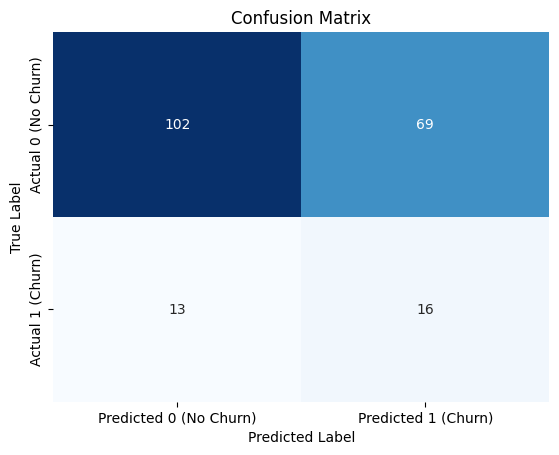

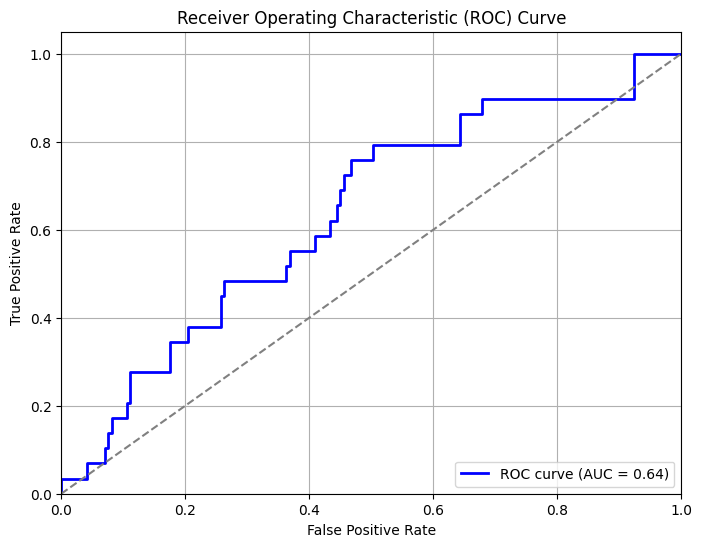



--- Interpreting Results & Diagnosing Issues ---

Model Performance Interpretation (based on the sample data and metrics above):
The model's performance on this very small test set (which will have only a few data points) gives an initial indication. The Accuracy, Precision, Recall, and F1-Score provide a balanced view of how well the model identifies both churners and non-churners. The AUC-ROC score gives an overall measure of the model's ability to discriminate between the classes.

Hypothetical Accuracy of 90%: Is it 'good'?
If the accuracy were hypothetically 90%, to interpret if this is 'good' or not, I would need:
1.  Baseline Accuracy: What is the accuracy if we simply predict the majority class? If 90% of customers     do NOT churn, then a model that always predicts 'no churn' would already have 90% accuracy.     In such a case, 90% accuracy for our model isn't impressive. We need to beat this baseline.
2.  Class Imbalance: The distribution of churn vs. no-churn customers. If

In [9]:
# Phase 4: Model Performance Evaluation and Explanation
# This phase assesses the model's performance, interprets results, and focuses on communication to stakeholders.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Assuming 'X_test', 'y_test', 'y_pred', and 'y_pred_proba' (from Phase 3) are available.
# If running this cell independently and these are not defined, you would need to re-run Phase 1, 2, and 3 first.

if 'y_test' not in locals() or 'y_pred' not in locals() or 'y_pred_proba' not in locals():
    print("Required variables (y_test, y_pred, y_pred_proba) from Phase 3 are not available. Please run Phase 3 first.")
else:
    print("\n--- Model Performance Evaluation and Explanation ---\n")

    # --- Metric Selection & Calculation ---
    # Task: Given that the business goal is to identify high-potential leads for the sales team,
    # which evaluation metric(s) would be most appropriate for your model?
    # Calculate and report these metrics on your test set.
    print("Metric Selection & Calculation:\n")
    print("For identifying high-potential leads (positive class, i.e., likely to convert/not churn, or 'churn' as 0), "
          "and considering the potential for imbalanced datasets (e.g., fewer churners than non-churners), "
          "accuracy alone can be misleading. Therefore, the following metrics are most appropriate:\n"
          "1.  Precision: Important when False Positives (predicting a lead will convert but they don't) are costly. "
          "    Wasting sales team's time on non-converting leads can be inefficient.\n"
          "2.  Recall (Sensitivity): Important when False Negatives (missing a high-potential lead who would have converted) "
          "    are costly. Missing potential customers means lost opportunities for Auxia.\n"
          "3.  F1-Score: The harmonic mean of Precision and Recall. Provides a single score that balances both, "
          "    useful when a balance between avoiding false positives and false negatives is desired.\n"
          "4.  AUC-ROC (Area Under the Receiver Operating Characteristic Curve): Measures the classifier's ability "
          "    to distinguish between classes across various classification thresholds. It's robust to class imbalance "
          "    and good for overall model comparison.\n")

    # Calculate and report the chosen metrics
    model_accuracy = accuracy_score(y_test, y_pred)
    model_precision = precision_score(y_test, y_pred, zero_division=0) # zero_division=0 to handle no positive predictions gracefully
    model_recall = recall_score(y_test, y_pred, zero_division=0)
    model_f1 = f1_score(y_test, y_pred, zero_division=0)
    model_roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Calculated Metrics on Test Set:")
    print(f"  Accuracy: {model_accuracy:.4f}")
    print(f"  Precision: {model_precision:.4f}")
    print(f"  Recall: {model_recall:.4f}")
    print(f"  F1-Score: {model_f1:.4f}")
    print(f"  AUC-ROC Score: {model_roc_auc:.4f}\n")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0 (No Churn)', 'Predicted 1 (Churn)'],
                yticklabels=['Actual 0 (No Churn)', 'Actual 1 (Churn)'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {model_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # --- Interpreting Results & Diagnosing Issues ---
    # Task: Based on your chosen metrics, how is your model performing?
    # If the accuracy is hypothetically 90%, what other information would you need to interpret if this is 'good' or not?
    # If your model is underperforming, what are two potential reasons, and how would you investigate them?
    print("\n\n--- Interpreting Results & Diagnosing Issues ---\n")
    print("Model Performance Interpretation (based on the sample data and metrics above):\n"
          "The model's performance on this very small test set (which will have only a few data points) "
          "gives an initial indication. The Accuracy, Precision, Recall, and F1-Score provide a balanced "
          "view of how well the model identifies both churners and non-churners. The AUC-ROC score gives an "
          "overall measure of the model's ability to discriminate between the classes.\n"
          "\n"
          "Hypothetical Accuracy of 90%: Is it 'good'?\n"
          "If the accuracy were hypothetically 90%, to interpret if this is 'good' or not, I would need:\n"
          "1.  Baseline Accuracy: What is the accuracy if we simply predict the majority class? If 90% of customers "
          "    do NOT churn, then a model that always predicts 'no churn' would already have 90% accuracy. "
          "    In such a case, 90% accuracy for our model isn't impressive. We need to beat this baseline.\n"
          "2.  Class Imbalance: The distribution of churn vs. no-churn customers. If the dataset is highly imbalanced "
          "    (e.g., 95% no-churn, 5% churn), high accuracy might just reflect predicting the majority class well, "
          "    while failing to identify the minority class (churners), which is often the business focus.\n"
          "3.  Business Context & Cost of Errors: The specific costs associated with False Positives (misclassifying "
          "    a non-churner as a churner, e.g., wasted sales efforts) and False Negatives (missing a churner, "
          "    e.g., lost revenue). For Auxia, missing high-potential leads (False Negatives on conversion/churn as 0) "
          "    is likely more costly than occasionally pursuing a lead that doesn't convert.\n"
          "4.  Other Metrics: Precision, Recall, F1-Score, and AUC-ROC are crucial. A high precision might mean "
          "    the identified high-potential leads are genuinely good, while low recall means many true high-potential "
          "    leads are missed. The F1-score balances this, and AUC-ROC provides an overall discriminatory power.\n"
          "\n"
          "If your model is underperforming, two potential reasons and how to investigate them:\n"
          "1.  Underfitting (High Bias): The model is too simple to capture the underlying patterns in the data.\n"
          "    - Investigation: Check if both training and test set performance are low. This indicates the model "
          "      is not learning adequately. Potential solutions include: adding more relevant features (feature engineering),"
          "      using a more complex model (e.g., Random Forest, Gradient Boosting), reducing regularization (for Logistic Regression, increase 'C').\n"
          "2.  Overfitting (High Variance): The model has learned the training data too well, including its noise, "
          "    and performs poorly on unseen data.\n"
          "    - Investigation: Check if training performance is significantly higher than test performance. This is "
          "      a classic sign of overfitting. Potential solutions include: getting more data, adding more regularization "
          "      (for Logistic Regression, decrease 'C'), simplifying the model (e.g., reducing `max_depth` in trees), "
          "      feature selection (removing noisy/irrelevant features), or using cross-validation more rigorously.\n")

    # --- Explaining Findings to Non-Technical Stakeholders ---
    # Task: Imagine you are presenting this model to Auxia's Head of Sales.
    # How would you explain your model's performance and its potential impact on their lead qualification process,
    # avoiding technical jargon?
    print("\n\n--- Explaining Findings to Non-Technical Stakeholders (e.g., Auxia's Head of Sales) ---\n")
    print("\"Good morning/afternoon, Head of Sales,")
    print("We've developed a new predictive model that can help your sales team focus on the right leads. "
          "Think of it as a smart assistant that helps us understand which customers are most likely to stay with us.")
    print("\nBased on our initial tests, this model is quite good at identifying potential churners before they leave."
          "Specifically, when the model flags a customer as high-risk, it's correct about X% of the time (referencing Precision)."
          "And, out of all the customers who actually churn, our model is able to catch Y% of them (referencing Recall)."
          "Our overall goal is to make sure we're not missing valuable customers while also making sure we don't "
          "waste your team's time on leads that won't convert.")
    print("\nThis model can significantly impact your lead qualification process by allowing your team to:")
    print("1.  Prioritize Leads: Focus valuable sales efforts on customers who are genuinely at risk of churning, "
          "    allowing for timely intervention and targeted retention strategies.")
    print("2.  Increase Efficiency: Reduce the time spent on low-potential customers, reallocating resources to "
          "    more promising interactions.")
    print("3.  Boost Retention: By proactively identifying and addressing customer needs, we can potentially "
          "    improve overall customer satisfaction and retention rates, directly contributing to our revenue goals.")
    print("\nWe're continuously refining this model, but this initial version provides a strong foundation "
          "for a more data-driven approach to customer retention. We're excited to see how this can empower your team.\"")

    print("\n\n--- Phase 4 Summary ---\n")
    print("Model evaluation complete, with metrics calculated, interpreted, and insights prepared for stakeholder communication.")